Index([u'userid', u'age', u'dob_day', u'dob_year', u'dob_month', u'gender',
       u'tenure', u'friend_count', u'friendships_initiated', u'likes',
       u'likes_received', u'mobile_likes', u'mobile_likes_received',
       u'www_likes', u'www_likes_received'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_lik

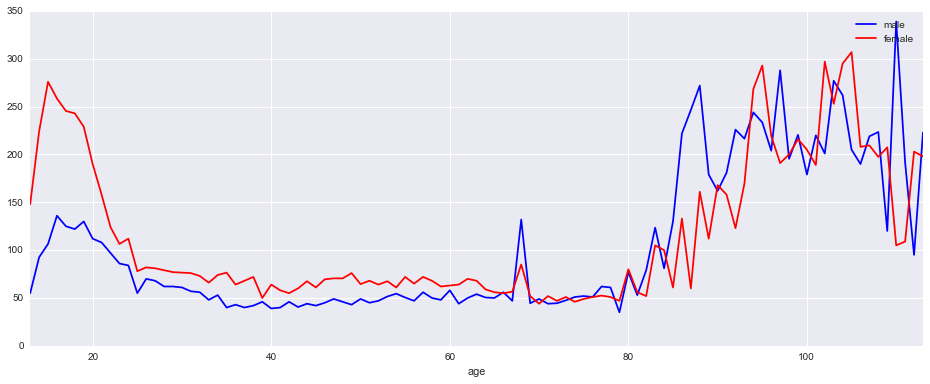

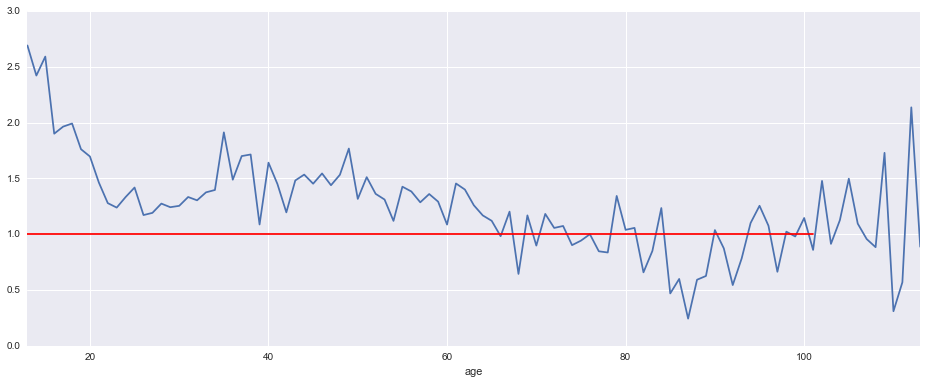

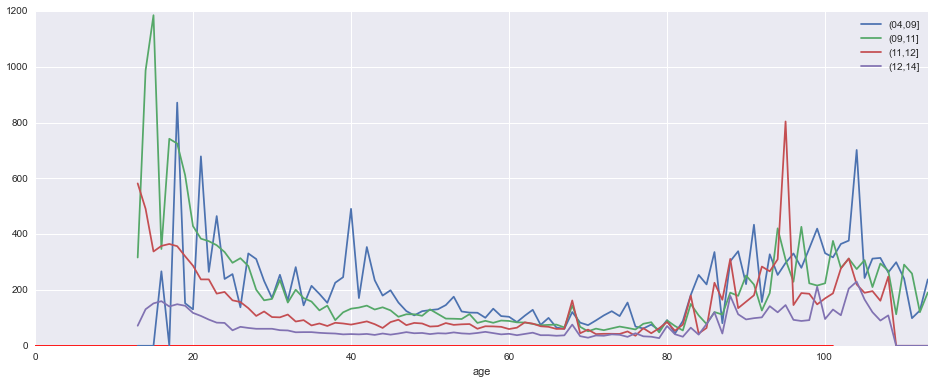

Index([u'obs', u'id', u'time', u'strawberry', u'blueberry', u'pina.colada',
       u'plain', u'mixed.berry', u'price'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2380 entries, 0 to 2379
Data columns (total 9 columns):
obs            2380 non-null int64
id             2380 non-null int64
time           2380 non-null int64
strawberry     2380 non-null int64
blueberry      2380 non-null int64
pina.colada    2380 non-null int64
plain          2380 non-null int64
mixed.berry    2380 non-null int64
price          2380 non-null float64
dtypes: float64(1), int64(8)
memory usage: 185.9 KB
None
   obs       id   time  strawberry  blueberry  pina.colada  plain  \
0    1  2100081   9678           0          0            0      0   
1    2  2100081   9697           0          0            0      0   
2    3  2100081   9825           0          0            0      0   
3    4  2100081   9999           0          0            0      0   
4    5  2100081  10015           

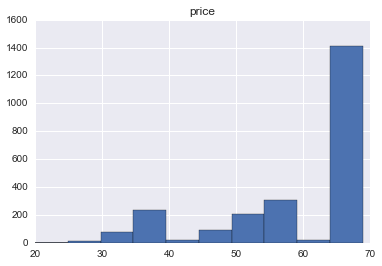

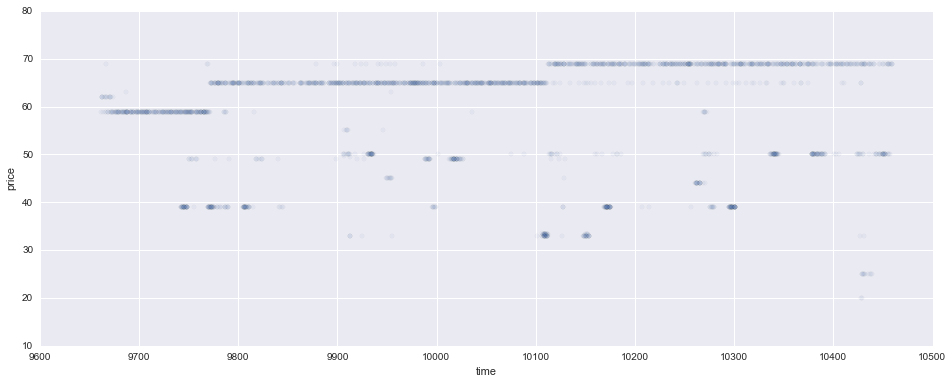

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2350    False
2351    False
2352    False
2353    False
2354    False
2355    False
2356    False
2357    False
2358    False
2359    False
2360    False
2361    False
2362    False
2363    False
2364    False
2365    False
2366    False
2367    False
2368    False
2369    False
2370    False
2371    False
2372    False
2373    False
2374    False
2375    False
2376    False
2377    False
2378    False
2379    False
Name: id, dtype: bool
               obs              id          time  strawberry   blueberry  \
count   148.000000      148.000000    148.000000

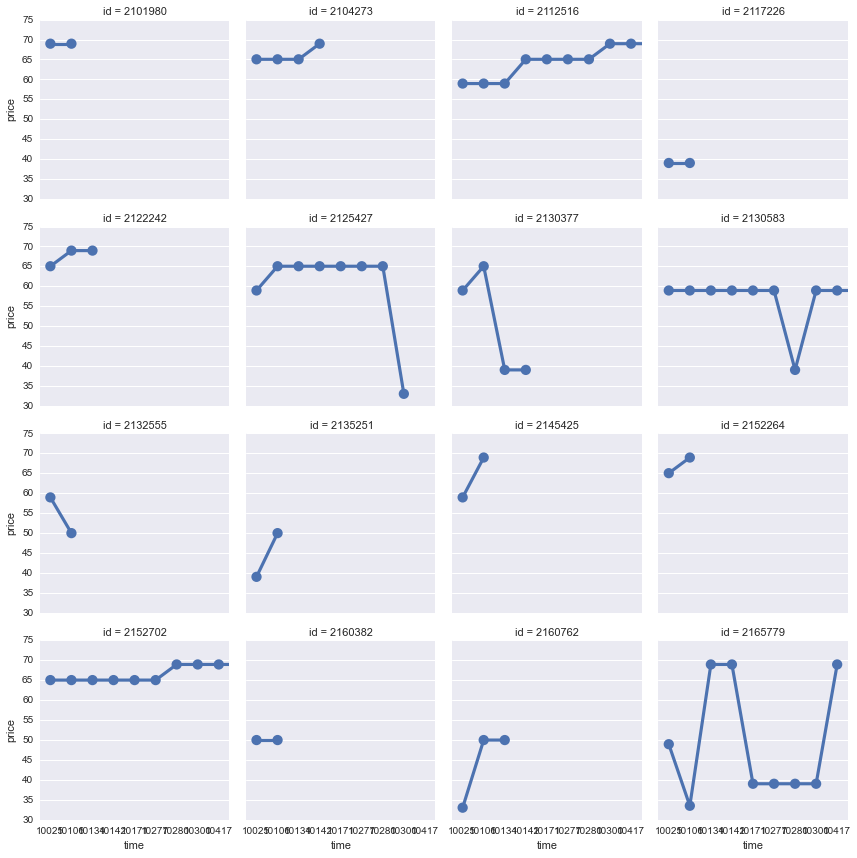

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from ggplot import *
from ggplot import diamonds
%matplotlib inline

df = pd.read_csv('data/pseudo_facebook.tsv', sep='\t')
print df.columns
print df.info()
print df.head()

avg_series = df['friend_count'].groupby([df['age'], df['gender']]).mean().reset_index()
print avg_series.head()
mdn_series = df['friend_count'].groupby([df['age'], df['gender']]).median().reset_index()
print mdn_series.head()
cnt_series = df['friend_count'].groupby([df['age'], df['gender']]).count().reset_index()
print cnt_series.head()

new_df = pd.DataFrame([avg_series,mdn_series,cnt_series])
new_df.head()

new_df = df.join(df.groupby(['age','gender'])['friend_count'].mean(), on=['age','gender'], rsuffix='_mean')
new_df = new_df.join(df.groupby(['age','gender'])['friend_count'].median(), on=['age','gender'], rsuffix='_median')
new_df = new_df.join(df.groupby(['age','gender'])['friend_count'].count(), on=['age','gender'], rsuffix='_count')
new_df = new_df[['age','gender','friend_count_mean','friend_count_median','friend_count_count']]
new_df.drop_duplicates(inplace=True)
new_df.head()
new_df.sort(columns=['age'], inplace=True)

ax = new_df[new_df.gender ==   'male'].plot('age', 'friend_count_median', kind='line', label=  'male', figsize=(16,6), color='blue')
new_df[new_df.gender == 'female'].plot('age', 'friend_count_median', kind='line', label='female', figsize=(16,6), color='red',ax=ax)
plt.legend()
plt.show()

pivoted = new_df.pivot(index='age', columns='gender', values='friend_count_median')
pivoted.head()
pivoted.columns
pivoted = pivoted.dropna(axis=1, how='all')
pivoted.head()
pivoted['ratio'] = pivoted['female'] / pivoted['male']
pivoted.head()

plt.hold(True)
ax = pivoted['ratio'].plot(kind='line', figsize=(16,6))
plt.plot((0,101),(1,1),'r-')
plt.show()

df['year_joined'] = 2014 - np.floor((df['tenure'] / 365))
df.head()

df['year_joined_bucket'] = pd.cut(df['year_joined'], [2004, 2009, 2011, 2012, 2014],
                                  labels=['(04,09]','(09,11]','(11,12]','(12,14]'])
df.head()
new_df = df.join(df.groupby(['age','year_joined_bucket'])['friend_count'].median(), on=['age','year_joined_bucket'], rsuffix='_median')
new_df = new_df[['age','year_joined_bucket','friend_count_median']]
new_df.drop_duplicates(inplace=True)
new_df.head()
new_df.sort(columns=['age'], inplace=True)
new_df.head()

pivoted = new_df.pivot(index='age', columns='year_joined_bucket', values='friend_count_median')
pivoted.head()
pivoted.columns
pivoted = pivoted.dropna(axis=1, how='all')
pivoted.head()
pivoted.fillna(0,inplace=True)

fig, ax = plt.subplots()
plt.hold(True)
plt.plot((0,101),(1,1),'r-')
for bucket in pivoted.columns:    
    ax = pivoted[bucket].plot(kind='line', figsize=(16,6), label=bucket, ax=ax)
plt.legend()
plt.show()

yogs = pd.read_csv('data/yogurt.csv')
print yogs.columns
print yogs.info()
print yogs.head()

yogs['id'] = yogs['id'].astype('category')
yogs.info()
yogs.hist('price')
plt.show()
yogs.price.value_counts().sort_index()

#yog_all = yogs.groupby('obs').apply(lambda sdf: sdf[])
yogs.obs.unique().size
yogs['total_purchases'] = yogs[['strawberry','blueberry','mixed.berry','pina.colada','plain']].sum(axis=1)
yogs.head()

yogs.plot('time', 'price', kind='scatter', figsize=((16,6)), alpha=0.05)
plt.show()

yogs['id'] = yogs['id'].astype('int')
idsample = np.random.choice(yogs.id.unique(), 16, replace=False)
print yogs['id'].isin(idsample)
sampl_yogs = yogs[yogs['id'].isin(idsample)]
#sampl_yogs = yogs[yogs.id > 2363]

print sampl_yogs.describe()
print sampl_yogs.head(200)

g = sns.FacetGrid(sampl_yogs, col='id', col_wrap=4)
g = g.map(sns.pointplot, 'time', 'price')
plt.show()